# C: Gaussian Distributions and Counting Experiments

This file contains code for the unit:Number Theory.

This program runs in about 14.96 seconds (Windows 10, 16 GB)

In [5]:
try:
    from cloudmesh.common.StopWatch import StopWatch
except:  # noqa: E722
    ! pip install cloudmesh-common
    from cloudmesh.common.StopWatch import StopWatch

## Part 1 25 Events 40000 Times

Illustrating Gaussian errors

In [6]:
StopWatch.start("total")
StopWatch.start("import")
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ndtri
StopWatch.stop("import")

Method that returns returns value of the gaussian given an input array and mean and standard deviation

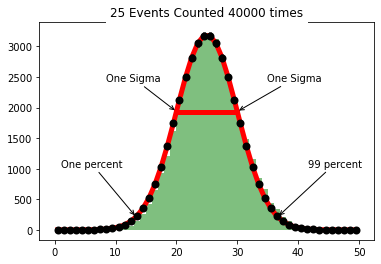

In [7]:
StopWatch.start("Part 1")
def Normal(x, mu,sigma):
    return np.exp(- (x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

'''Counting 25 events 40000 times'''
StopWatch.start("data-create-1")
Events25 = np.random.rand(1000000)              #generate 25*40000 = 1,000,000 random numbers
Counters25 = np.zeros(40000)                    #generate an array with 40000 entries all set to 0
for value in Events25:
    Place = int(40000 * value)                  #Scale the random values to range between 0 to 40000
    Counters25[Place] +=1                       #Increment counts for the value as per the scaled value
StopWatch.stop("data-create-1")
####Plot- The result of counting 25 events 40000 times as well as the errors, one sigma, one percent, 99 percent
###See figure - Count 25 Events 40000 times
StopWatch.start("data-plot-1")
plt.figure("Count 25 Events 40000 times")
Numcounts25, binedges25, patches = plt.hist(Counters25, bins = 50, range = (0,50), color = "green", alpha = 0.5)    #plot histogram with 50 bins. Store Number of counts/bin and bin edges
centers25 = 0.5*(binedges25[1:] + binedges25[:-1])                                                                  #Computing bin centers as means of the bin edge values
y25 = 40000 * Normal(centers25, 25, np.sqrt(25))                                                                    #Compute the y values(as per the gaussian function)
xbar25 = np.zeros(2)                                                                                                
ybar25 = np.zeros(2)                                                                                                
xbar25[0] = 25 - np.sqrt(25)                                                                                        #Compute the one sigma values as
xbar25[1] = 25 + np.sqrt(25)                                                                                        #mean +-error(on the mean value)
ybar25 = 40000*Normal(xbar25, 25, np.sqrt(25))                                                                      #Computing y values as per the gaussian function for the X values
plt.plot(xbar25, ybar25, color= "red", alpha = 1.0, lw =5)                                                          #plot the line joining the 2 one sigma points
plt.plot(centers25, y25, alpha = 1.0, color = "red", lw =5)                                                         #plot the gaussian function passing through the center of each bin

errors25 = np.sqrt(y25)                                                                                             #Compute the expected error on Y-values
plt.errorbar(centers25, y25, yerr = errors25, linestyle='None', linewidth = 3.0, markeredgewidth = 3.0, marker ='o', color = 'black', markersize= 5.0 )     #Plot the errors on Y values 

prob1percent25 = 25 + np.sqrt(25) * ndtri(0.01)                 #compute the 1% point - x value
prob99percent25 = 25 + np.sqrt(25) * ndtri(0.99)                #compute the 99% point - x value
y1percent25 = 40000*Normal(prob1percent25, 25, np.sqrt(25))     #compute the 1% point - y value
y99percent25 = 40000*Normal(prob99percent25, 25, np.sqrt(25))   #compute the 99% point - y value
#Perform labelling operations for the plots
plt.annotate('One percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-75,50), xy = (prob1percent25, y1percent25))
plt.annotate('99 percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(30,50), xy = (prob99percent25, y99percent25))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (20,ybar25[0]), xytext = (-70,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (30,ybar25[1]), xytext = (30,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.title("25 Events Counted 40000 times", backgroundcolor = "white")
plt.show()
StopWatch.stop("data-plot-1")
StopWatch.stop("Part 1")

## Part 2 250 Events Counted 40000 times



A similar experiment as above is performed with 250 events being performed 40000 times. Refer to the documentation of the above section.

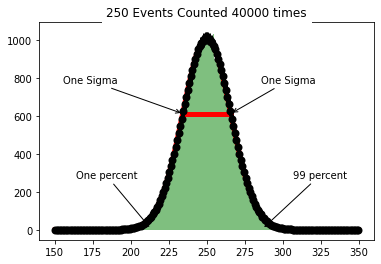

In [8]:
StopWatch.start("Part 2")
StopWatch.start("data-create-2")
Events250 = np.random.rand(10000000)
Counters250 = np.zeros(40000)
for value in Events250:
    Place = int(40000 * value)
    Counters250[Place] +=1
StopWatch.stop("data-create-2")
####Plot- The result of counting 250 events 40000 times as well as the errors, one sigma, one percent, 99 percent. This is identocal to plotting described above. Refer to the documentation of the above section
###See figure - Count 250 Events 40000 times
StopWatch.start("data-plot-2")
plt.figure("Count 250 Events 40000 times")
Numcounts250, binedges250, patches = plt.hist(Counters250, bins = 200, range = (150,350), color = "green", alpha = 0.5)
centers250 = 0.5*(binedges250[1:] + binedges250[:-1])
y250 = 40000 * Normal(centers250, 250, np.sqrt(250))
errors250 = np.sqrt(y250)
xbar250 = np.zeros(2)
ybar250 = np.zeros(2)
xbar250[0] = 250 - np.sqrt(250)
xbar250[1] = 250 + np.sqrt(250)
ybar250 = 40000*Normal(xbar250, 250, np.sqrt(250))
plt.plot(xbar250, ybar250, color= "red", alpha = 1.0, lw =5)
plt.plot(centers250, y250, alpha = 1.0, color = "red", lw =5)
plt.errorbar(centers250, y250, yerr = errors250, linestyle='None', linewidth = 3.0, markeredgewidth = 3.0, marker ='o', color = 'black', markersize= 5.0 )

prob1percent250 = 250 + np.sqrt(250) * ndtri(0.01)
prob99percent250 = 250 + np.sqrt(250) * ndtri(0.99)
y1percent250 = 4000*Normal(prob1percent250, 250, np.sqrt(250))
y99percent250 = 4000*Normal(prob99percent250, 250, np.sqrt(250))
plt.annotate('One percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-75,50), xy = (prob1percent250, y1percent250))
plt.annotate('99 percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(30,50), xy = (prob99percent250, y99percent250))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250[0],ybar250[0]), xytext = (-120,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250[1],ybar250[1]), xytext = (30,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.title("250 Events Counted 40000 times", backgroundcolor = "white")
plt.show()
StopWatch.stop("data-plot-2")
StopWatch.stop("Part 2")

## Part 3 250 (mean) events each 400 times

The above experiment is repeated with 250 events, each event repeating 400 times. It is performed with 2 different seeds for random numbers.

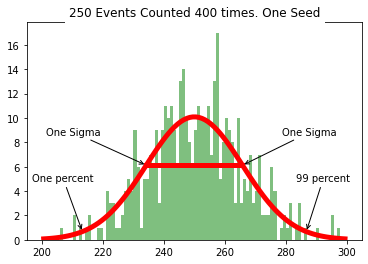

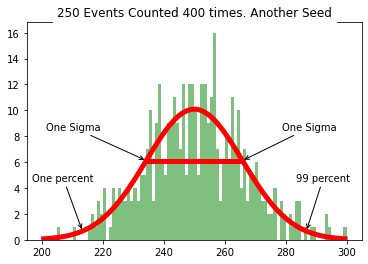

In [9]:
StopWatch.start("Part 3")
####First random set
StopWatch.start("data-create-3")
Events250A = np.random.rand(100000)
Counters250A = np.zeros(400)
for value in Events250A:
    Place = int(400 * value)
    Counters250A[Place] +=1
StopWatch.stop("data-create-3")
####Plot- The result of counting 250 events 400 times as well as the errors, one sigma, one percent, 99 percent. This is identical to plotting described above. Refer to the documentation of the above section
###See figure - Count 250 Events 400 times I
StopWatch.start("data-plot-3")
plt.figure("Count 250 Events 400 times I")
Numcounts250A, binedges250A, patches = plt.hist(Counters250A, bins = 100, range = (200,300), color = "green", alpha = 0.5)
centers250A = 0.5*(binedges250A[1:] + binedges250A[:-1])
y250A = 400 * Normal(centers250A, 250, np.sqrt(250))
xbar250A = np.zeros(2)
ybar250A = np.zeros(2)
xbar250A[0] = 250 - np.sqrt(250)
xbar250A[1] = 250 + np.sqrt(250)
ybar250A = 400*Normal(xbar250A, 250, np.sqrt(250))
plt.plot(xbar250A, ybar250A, color= "red", alpha = 1.0, lw =5)
plt.plot(centers250A, y250A, alpha = 1.0, color = "red", lw =5)

prob1percent250A = 250 + np.sqrt(250) * ndtri(0.01)
prob99percent250A = 250 + np.sqrt(250) * ndtri(0.99)
y1percent250A = 400*Normal(prob1percent250A, 250, np.sqrt(250))
y99percent250A = 400*Normal(prob99percent250A, 250, np.sqrt(250))
plt.annotate('One percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-50,50), xy = (prob1percent250A, y1percent250A))
plt.annotate('99 percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-10,50), xy = (prob99percent250A, y99percent250A))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250A[0],ybar250A[0]), xytext = (-100,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250A[1],ybar250A[1]), xytext = (40,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.title("250 Events Counted 400 times. One Seed", backgroundcolor = "white")
### Second random set.
Events250A = np.random.rand(100000)
Counters250A = np.zeros(400)
for value in Events250A:
    Place = int(400 * value)
    Counters250A[Place] +=1
####Plot- The result of counting 250 events 400 times as well as the errors, one sigma, one percent, 99 percent with separate seed. This is identical to plotting described above. Refer to the documentation of the above section
###See figure - Count 250 Events 400 times II
plt.figure("Count 250 Events 400 times II")
Numcounts250A, binedges250A, patches = plt.hist(Counters250A, bins = 100, range = (200,300), color = "green", alpha = 0.5)
centers250A = 0.5*(binedges250A[1:] + binedges250A[:-1])
y250A = 400 * Normal(centers250A, 250, np.sqrt(250))
xbar250A = np.zeros(2)
ybar250A = np.zeros(2)
xbar250A[0] = 250 - np.sqrt(250)
xbar250A[1] = 250 + np.sqrt(250)
ybar250A = 400*Normal(xbar250A, 250, np.sqrt(250))
plt.plot(xbar250A, ybar250A, color= "red", alpha = 1.0, lw =5)
plt.plot(centers250A, y250A, alpha = 1.0, color = "red", lw =5)

prob1percent250A = 250 + np.sqrt(250) * ndtri(0.01)
prob99percent250A = 250 + np.sqrt(250) * ndtri(0.99)
y1percent250A = 400*Normal(prob1percent250A, 250, np.sqrt(250))
y99percent250A = 400*Normal(prob99percent250A, 250, np.sqrt(250))
plt.annotate('One percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-50,50), xy = (prob1percent250A, y1percent250A))
plt.annotate('99 percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-10,50), xy = (prob99percent250A, y99percent250A))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250A[0],ybar250A[0]), xytext = (-100,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250A[1],ybar250A[1]), xytext = (40,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.title("250 Events Counted 400 times. Another Seed", backgroundcolor = "white")
plt.show()
StopWatch.stop("data-plot-3")
StopWatch.stop("Part 3")

## Part 4 Different Seeds counting 250 events 400 times

The above experiment is repeated with 250 events, each event repeating 400. It is performed with 2 different seeds for random numbers. The number of bins is decreased to 20.

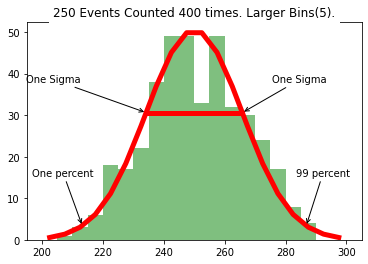

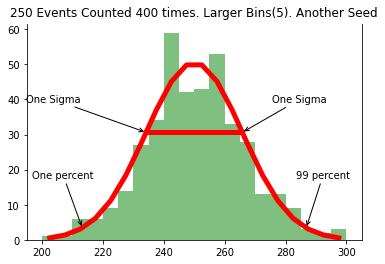

In [10]:
StopWatch.start("Part 4")
###First set of random numbers
StopWatch.start("data-create-4.1")
Events250C = np.random.rand(100000)
Counters250C = np.zeros(400)
for value in Events250C:
    Place = int(400 * value)
    Counters250C[Place] +=1
StopWatch.stop("data-create-4.1")
####Plot- The result of counting 250 events 400 times as well as the errors, one sigma, one percent, 99 percent. The number of bins is decreased to 20. This is identical to plotting described above. Refer to the documentation of the above section
###See figure - Count 250 Events 400 times Larger Bins
StopWatch.start("data-plot-4.1")
plt.figure("Count 250 Events 400 times Larger Bins.")
Numcounts250C, binedges250C, patches = plt.hist(Counters250C, bins = 20, range = (200,300), color = "green", alpha = 0.5)
centers250C = 0.5*(binedges250C[1:] + binedges250C[:-1])
y250C = 2000 * Normal(centers250C, 250, np.sqrt(250))
xbar250C = np.zeros(2)
ybar250C = np.zeros(2)
xbar250C[0] = 250 - np.sqrt(250)
xbar250C[1] = 250 + np.sqrt(250)
ybar250C = 2000*Normal(xbar250C, 250, np.sqrt(250))
plt.plot(xbar250C, ybar250C, color= "red", alpha = 1.0, lw =5)
plt.plot(centers250C, y250C, alpha = 1.0, color = "red", lw =5)

prob1percent250C = 250 + np.sqrt(250) * ndtri(0.01)
prob99percent250C = 250 + np.sqrt(250) * ndtri(0.99)
y1percent250C = 2000*Normal(prob1percent250C, 250, np.sqrt(250))
y99percent250C = 2000*Normal(prob99percent250C, 250, np.sqrt(250))
plt.annotate('One percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-50,50), xy = (prob1percent250C, y1percent250C))
plt.annotate('99 percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-10,50), xy = (prob99percent250C, y99percent250C))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250C[0],ybar250C[0]), xytext = (-120,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250C[1],ybar250C[1]), xytext = (30,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.title("250 Events Counted 400 times. Larger Bins(5).", backgroundcolor = "white")
plt.show()
StopWatch.stop("data-plot-4.1")

StopWatch.start("data-create-4.2")
#second set of random numbers
Events250C = np.random.rand(100000)
Counters250C = np.zeros(400)
for value in Events250C:
    Place = int(400 * value)
    Counters250C[Place] +=1
StopWatch.stop("data-create-4.2")

####Plot- The result of counting 250 events 400 times as well as the errors, one sigma, one percent, 99 percent with separate seed. The number of bins is decreased to 20 The number of bins is decreased to 20. This is identical to plotting described above. Refer to the documentation of the above section
###See figure - Count 250 Events 400 times Larger Bins. Another Seed
StopWatch.start("data-plot-4.2")
plt.figure("Count 250 Events 400 times Larger Bins. Another Seed")
Numcounts250C, binedges250C, patches = plt.hist(Counters250C, bins = 20, range = (200,300), color = "green", alpha = 0.5)
centers250C = 0.5*(binedges250C[1:] + binedges250C[:-1])
y250C = 2000 * Normal(centers250C, 250, np.sqrt(250))
xbar250C = np.zeros(2)
ybar250C = np.zeros(2)
xbar250C[0] = 250 - np.sqrt(250)
xbar250C[1] = 250 + np.sqrt(250)
ybar250C = 2000*Normal(xbar250C, 250, np.sqrt(250))
plt.plot(xbar250C, ybar250C, color= "red", alpha = 1.0, lw =5)
plt.plot(centers250C, y250C, alpha = 1.0, color = "red", lw =5)

prob1percent250C = 250 + np.sqrt(250) * ndtri(0.01)
prob99percent250C = 250 + np.sqrt(250) * ndtri(0.99)
y1percent250C = 2000*Normal(prob1percent250C, 250, np.sqrt(250))
y99percent250C = 2000*Normal(prob99percent250C, 250, np.sqrt(250))
plt.annotate('One percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-50,50), xy = (prob1percent250C, y1percent250C))
plt.annotate('99 percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-10,50), xy = (prob99percent250C, y99percent250C))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250C[0],ybar250C[0]), xytext = (-120,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250C[1],ybar250C[1]), xytext = (30,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.title("250 Events Counted 400 times. Larger Bins(5). Another Seed", backgroundcolor = "white")
plt.show()
StopWatch.stop("data-plot-4.2")
StopWatch.stop("Part 4")

## Part 5 counting 250 events 4000 times

The above experiment is repeated with 250 events, each event repeating 4000. It is performed with 2 different seeds for random numbers. The number of bins is 100.

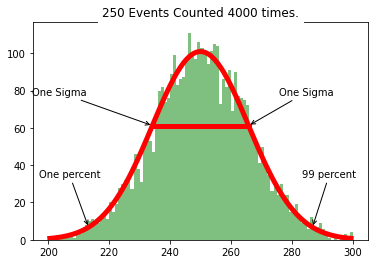

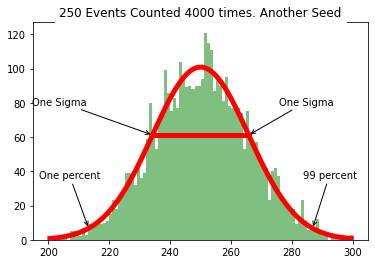


+------------------+----------------------------------------------------------------------------------+
| Attribute        | Value                                                                            |
|------------------+----------------------------------------------------------------------------------|
| cpu              |                                                                                  |
| cpu_cores        | 4                                                                                |
| cpu_count        | 8                                                                                |
| cpu_threads      | 8                                                                                |
| date             | 2022-07-14 18:58:29.854117                                                       |
| frequency        | scpufreq(current=1298.0, min=0.0, max=1498.0)                                    |
| mem.available    | 5.8 GiB                                   

In [11]:
StopWatch.start("Part 5")
###Random set 1
StopWatch.start("data-create-5.1")
Events250B = np.random.rand(1000000)
Counters250B = np.zeros(4000)
for value in Events250B:
    Place = int(4000 * value)
    Counters250B[Place] +=1
StopWatch.stop("data-create-5.1")

####Plot- The result of counting 250 events 4000 times as well as the errors, one sigma, one percent, 99 percent with separate seed.This is identical to plotting described above. Refer to the documentation of the above section
###See figure - Count 250 Events 4000 times
StopWatch.start("data-plot-5.1")
plt.figure("Count 250 Events 4000 times")
Numcounts250B, binedges250B, patches = plt.hist(Counters250B, bins = 100, range = (200,300), color = "green", alpha = 0.5)
centers250B = 0.5*(binedges250B[1:] + binedges250B[:-1])
y250B = 4000 * Normal(centers250B, 250, np.sqrt(250))
xbar250B = np.zeros(2)
ybar250B = np.zeros(2)
xbar250B[0] = 250 - np.sqrt(250)
xbar250B[1] = 250 + np.sqrt(250)
ybar250B = 4000*Normal(xbar250B, 250, np.sqrt(250))
plt.plot(xbar250B, ybar250B, color= "red", alpha = 1.0, lw =5)
plt.plot(centers250B, y250B, alpha = 1.0, color = "red", lw =5)

prob1percent250B = 250 + np.sqrt(250) * ndtri(0.01)
prob99percent250B = 250 + np.sqrt(250) * ndtri(0.99)
y1percent250B = 4000*Normal(prob1percent250B, 250, np.sqrt(250))
y99percent250B = 4000*Normal(prob99percent250B, 250, np.sqrt(250))
plt.annotate('One percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-50,50), xy = (prob1percent250B, y1percent250B))
plt.annotate('99 percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-10,50), xy = (prob99percent250B, y99percent250B))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250B[0],ybar250B[0]), xytext = (-120,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250B[1],ybar250B[1]), xytext = (30,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.title("250 Events Counted 4000 times.", backgroundcolor = "white")
StopWatch.stop("data-plot-5.1")

###Second random set
StopWatch.start("data-create-5.2")
Events250B = np.random.rand(1000000)
Counters250B = np.zeros(4000)
for value in Events250B:
    Place = int(4000 * value)
    Counters250B[Place] +=1
StopWatch.stop("data-create-5.2")

####Plot- The result of counting 250 events 4000 times as well as the errors, one sigma, one percent, 99 percent with separate seed. This is identical to plotting described above. Refer to the documentation of the above section
###See figure - Count 250 Events 4000 times Another Seed
StopWatch.start("data-plot-5.2")
plt.figure("Count 250 Events 4000 times Another Seed")
Numcounts250B, binedges250B, patches = plt.hist(Counters250B, bins = 100, range = (200,300), color = "green", alpha = 0.5)
centers250B = 0.5*(binedges250B[1:] + binedges250B[:-1])
y250B = 4000 * Normal(centers250B, 250, np.sqrt(250))
xbar250B = np.zeros(2)
ybar250B = np.zeros(2)
xbar250B[0] = 250 - np.sqrt(250)
xbar250B[1] = 250 + np.sqrt(250)
ybar250B = 4000*Normal(xbar250B, 250, np.sqrt(250))
plt.plot(xbar250B, ybar250B, color= "red", alpha = 1.0, lw =5)
plt.plot(centers250B, y250B, alpha = 1.0, color = "red", lw =5)

prob1percent250B = 250 + np.sqrt(250) * ndtri(0.01)
prob99percent250B = 250 + np.sqrt(250) * ndtri(0.99)
y1percent250B = 4000*Normal(prob1percent250B, 250, np.sqrt(250))
y99percent250B = 4000*Normal(prob99percent250B, 250, np.sqrt(250))
plt.annotate('One percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-50,50), xy = (prob1percent250B, y1percent250B))
plt.annotate('99 percent', xycoords="data", textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"), xytext =(-10,50), xy = (prob99percent250B, y99percent250B))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250B[0],ybar250B[0]), xytext = (-120,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.annotate('One Sigma', xycoords="data", textcoords='offset points', xy = (xbar250B[1],ybar250B[1]), xytext = (30,30), arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.title("250 Events Counted 4000 times. Another Seed", backgroundcolor = "white")
#For Agg backen
plt.show()
StopWatch.stop("data-plot-5.2")
StopWatch.stop("Part 5")
StopWatch.stop("total")
StopWatch.benchmark()